# ドル円レート 週足 メジアン統計

In [1]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pingouin as pg
import seaborn as sns
import yfinance as yf

In [2]:
code = 'USDJPY=X'
symbol = code
ticker = yf.Ticker(symbol)

In [3]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period='10y', interval='1wk')

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y =  datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-18 00:00:00+01:00,126.617996,129.373993,126.263000,128.320999,0,0.0,0.0
2022-04-25 00:00:00+01:00,128.604996,131.220993,127.043999,129.682007,0,0.0,0.0
2022-05-02 00:00:00+01:00,130.011002,130.804993,128.774994,130.462997,0,0.0,0.0
2022-05-09 00:00:00+01:00,130.748993,131.324997,127.584999,129.250000,0,0.0,0.0
2022-05-16 00:00:00+01:00,129.432007,129.750000,127.028999,127.919998,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-17 00:00:00+00:00,148.598007,150.141998,148.179993,149.330002,0,0.0,0.0
2025-03-24 00:00:00+00:00,149.677002,151.199997,149.470001,149.830002,0,0.0,0.0
2025-03-31 00:00:00+01:00,149.617004,150.076004,144.602005,146.929993,0,0.0,0.0


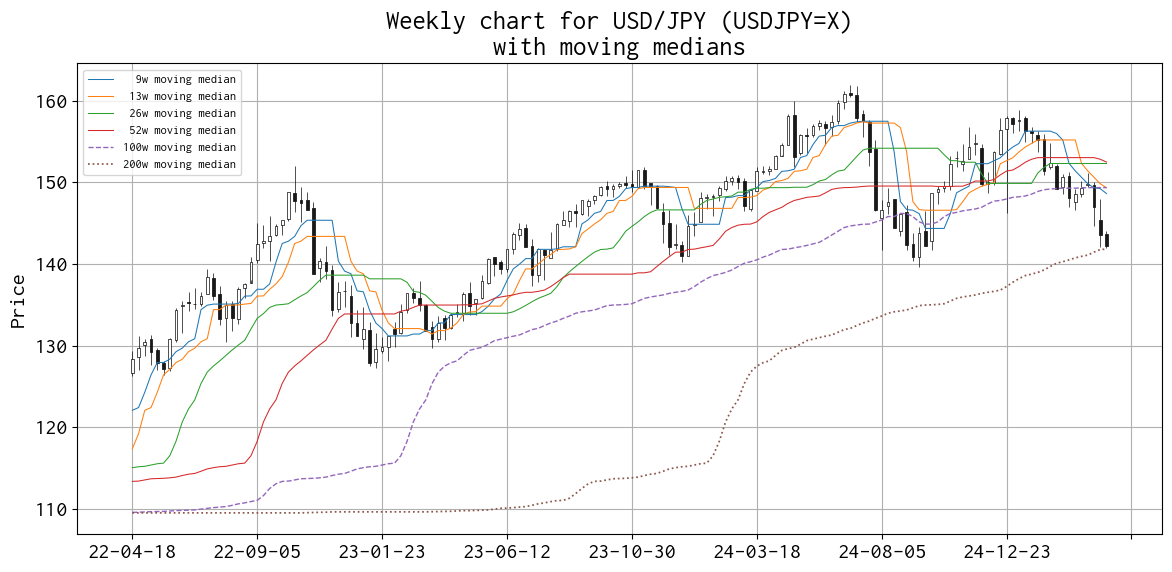

In [4]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()
apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label='  9w moving median', ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label=' 13w moving median', ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label=' 26w moving median', ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label=' 52w moving median', ax=ax),
    mpf.make_addplot(mm100[df.index], width=1, linestyle='dashed', label='100w moving median', ax=ax),
    mpf.make_addplot(mm200[df.index], width=1.25, linestyle='dotted', label='200w moving median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nwith moving medians' % (ticker.info['longName'], symbol))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig('report_weekly_chart_robust_%s.png' % code)
plt.show()

In [5]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-04-14 00:00:00+01:00,143.695999,144.046997,141.914993,142.149994,0,0.0,0.0


In [6]:
df.tail(2)['Close']

Date
2025-04-07 00:00:00+01:00    143.514999
2025-04-14 00:00:00+01:00    142.149994
Name: Close, dtype: float64

In [7]:
df.tail(2)['Close'].diff()

Date
2025-04-07 00:00:00+01:00         NaN
2025-04-14 00:00:00+01:00   -1.365005
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(9).median().tail(10)

Date
2025-02-10 00:00:00+00:00    156.270004
2025-02-17 00:00:00+00:00    155.979996
2025-02-24 00:00:00+00:00    155.190002
2025-03-03 00:00:00+00:00    152.330002
2025-03-10 00:00:00+00:00    151.399994
2025-03-17 00:00:00+00:00    150.613998
2025-03-24 00:00:00+00:00    149.830002
2025-03-31 00:00:00+01:00    149.330002
2025-04-07 00:00:00+01:00    149.229996
2025-04-14 00:00:00+01:00    148.619995
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(13).median().tail(10)

Date
2025-02-10 00:00:00+00:00    155.190002
2025-02-17 00:00:00+00:00    155.190002
2025-02-24 00:00:00+00:00    155.190002
2025-03-03 00:00:00+00:00    155.190002
2025-03-10 00:00:00+00:00    155.190002
2025-03-17 00:00:00+00:00    152.330002
2025-03-24 00:00:00+00:00    151.399994
2025-03-31 00:00:00+01:00    150.613998
2025-04-07 00:00:00+01:00    149.830002
2025-04-14 00:00:00+01:00    149.330002
Name: Close, dtype: float64

In [16]:
df['Close'].rolling(26).median().tail(15)

Date
2025-01-06 00:00:00+00:00    149.864998
2025-01-13 00:00:00+00:00    149.864998
2025-01-20 00:00:00+00:00    149.864998
2025-01-27 00:00:00+00:00    151.129997
2025-02-03 00:00:00+00:00    151.839996
2025-02-10 00:00:00+00:00    152.305000
2025-02-17 00:00:00+00:00    152.305000
2025-02-24 00:00:00+00:00    152.305000
2025-03-03 00:00:00+00:00    152.305000
2025-03-10 00:00:00+00:00    152.305000
2025-03-17 00:00:00+00:00    152.305000
2025-03-24 00:00:00+00:00    152.305000
2025-03-31 00:00:00+01:00    152.305000
2025-04-07 00:00:00+01:00    152.305000
2025-04-14 00:00:00+01:00    152.305000
Name: Close, dtype: float64

In [11]:
df['Close'].rolling(52).median().tail(15)

Date
2025-01-06 00:00:00+00:00    151.940002
2025-01-13 00:00:00+00:00    152.459999
2025-01-20 00:00:00+00:00    152.824997
2025-01-27 00:00:00+00:00    153.024994
2025-02-03 00:00:00+00:00    153.024994
2025-02-10 00:00:00+00:00    153.024994
2025-02-17 00:00:00+00:00    153.024994
2025-02-24 00:00:00+00:00    153.024994
2025-03-03 00:00:00+00:00    153.024994
2025-03-10 00:00:00+00:00    153.024994
2025-03-17 00:00:00+00:00    153.024994
2025-03-24 00:00:00+00:00    153.024994
2025-03-31 00:00:00+01:00    153.024994
2025-04-07 00:00:00+01:00    152.824997
2025-04-14 00:00:00+01:00    152.485001
Name: Close, dtype: float64

In [12]:
df0['Close'].rolling(100).median().tail(10)

Date
2025-02-10 00:00:00+00:00    149.180000
2025-02-17 00:00:00+00:00    149.224998
2025-02-24 00:00:00+00:00    149.279999
2025-03-03 00:00:00+00:00    149.279999
2025-03-10 00:00:00+00:00    149.279999
2025-03-17 00:00:00+00:00    149.330002
2025-03-24 00:00:00+00:00    149.347504
2025-03-31 00:00:00+01:00    149.347504
2025-04-07 00:00:00+01:00    149.347504
2025-04-14 00:00:00+01:00    149.347504
Name: Close, dtype: float64

In [13]:
df0['Close'].rolling(200).median().tail(10)

Date
2025-02-10 00:00:00+00:00    139.680000
2025-02-17 00:00:00+00:00    140.085999
2025-02-24 00:00:00+00:00    140.270996
2025-03-03 00:00:00+00:00    140.494995
2025-03-10 00:00:00+00:00    140.739998
2025-03-17 00:00:00+00:00    140.925003
2025-03-24 00:00:00+00:00    141.080002
2025-03-31 00:00:00+01:00    141.445000
2025-04-07 00:00:00+01:00    141.767502
2025-04-14 00:00:00+01:00    141.812500
Name: Close, dtype: float64

## Robust Bollinger bands

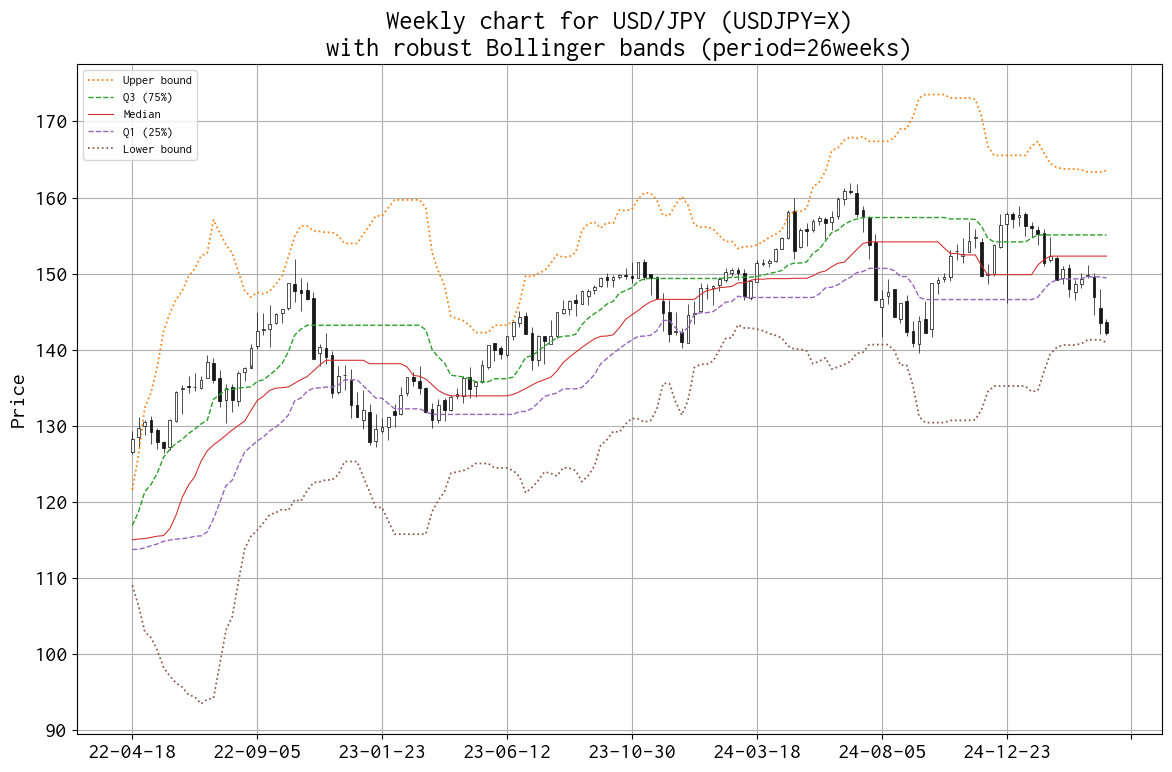

In [14]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 8))

# Bollinger bands
period = 26
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig('report_weekly_chart_bollinger_robust_%s.png' % code)
plt.show()

## ヒストグラム

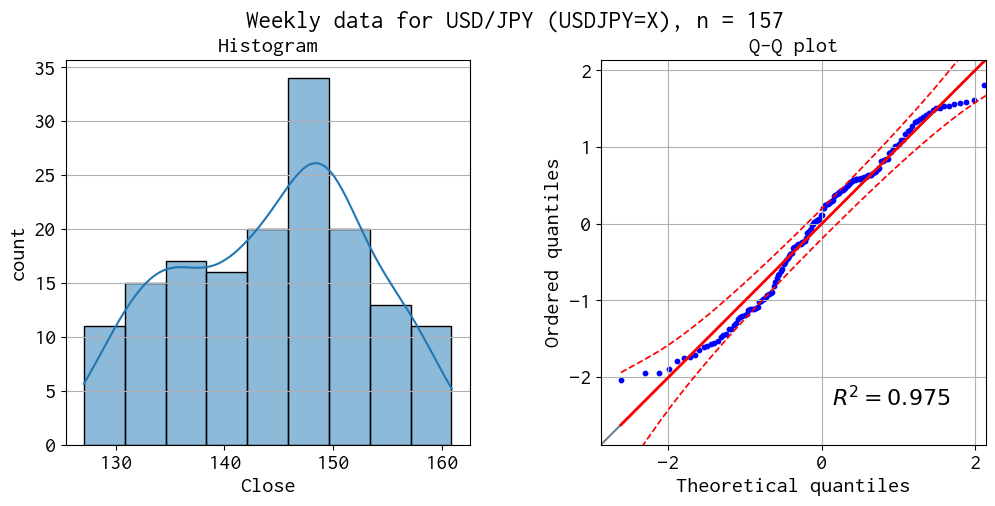

In [15]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig('report_weekly_histogram_qqplot_%s.png' % code)
plt.show()